In [65]:
# Used for imblananced dataset
!pip install imblearn

In [66]:
# Importing libarieres
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

In [67]:
# Reading the data 
df = pd.read_csv('churn.csv')
display(df.head())
display(df.shape)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


(3333, 21)

In [68]:
# Check the data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [69]:
# Summary Statistics of dataset
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [70]:
#Droping phone.number because it won't have any effect
df = df.drop('phone number',axis=1)

In [71]:
#All continous variables in cname
cname = df.columns[(df.dtypes=="float64")|(df.dtypes=="int64")].tolist()
print(cname)

#All categorical var in cat_names and removing target var
cat_names = df.select_dtypes(exclude=np.number).columns.tolist()
cat_names.remove('churn')
cat_names

['account length', 'area code', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls']


['state', 'international plan', 'voice mail plan']

In [72]:
df['international plan'].value_counts()

no     3010
yes     323
Name: international plan, dtype: int64

# Missing data

state                     0
account length            0
area code                 0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64


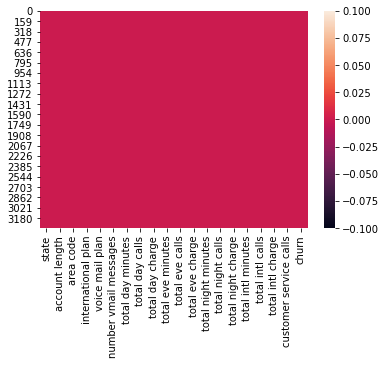

In [73]:
# Check the missing value through visualization and printing values
print(df.isnull().sum())  
sns.heatmap(df.isnull())

In [74]:
''' Both visualization and numbers represent no missing values in data set'''

' Both visualization and numbers represent no missing values in data set'

# Data Visualization 

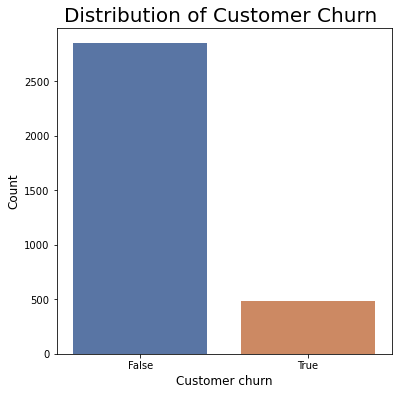

In [75]:
#Target Variable data distribution
plt.figure(figsize=(6,6))
sns.countplot(x = df.churn,palette='deep')
plt.xlabel('Customer churn', fontsize= 12)
plt.ylabel('Count', fontsize= 12)
plt.title("Distribution of Customer Churn ",fontsize= 20)
plt.show()

In [76]:
'''From graph it is clear that we have a class Imbalance problem'''

'From graph it is clear that we have a class Imbalance problem'

In [77]:
#Groupby --> size to represent ---> unstack the category

#Relationational bar graph for checking data distribution with respect to target variable
def diff_bar(x,y):
    
    df.groupby([x,y]).size().unstack(level=-1).plot(kind='bar', figsize=(35,10))
    plt.xlabel(x,fontsize= 25)
    plt.ylabel('count',fontsize= 25)
    plt.legend(loc=0,fontsize= 25)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.title("{X} Vs {Y}".format(X=x,Y=y),fontsize = 40)
    plt.show()

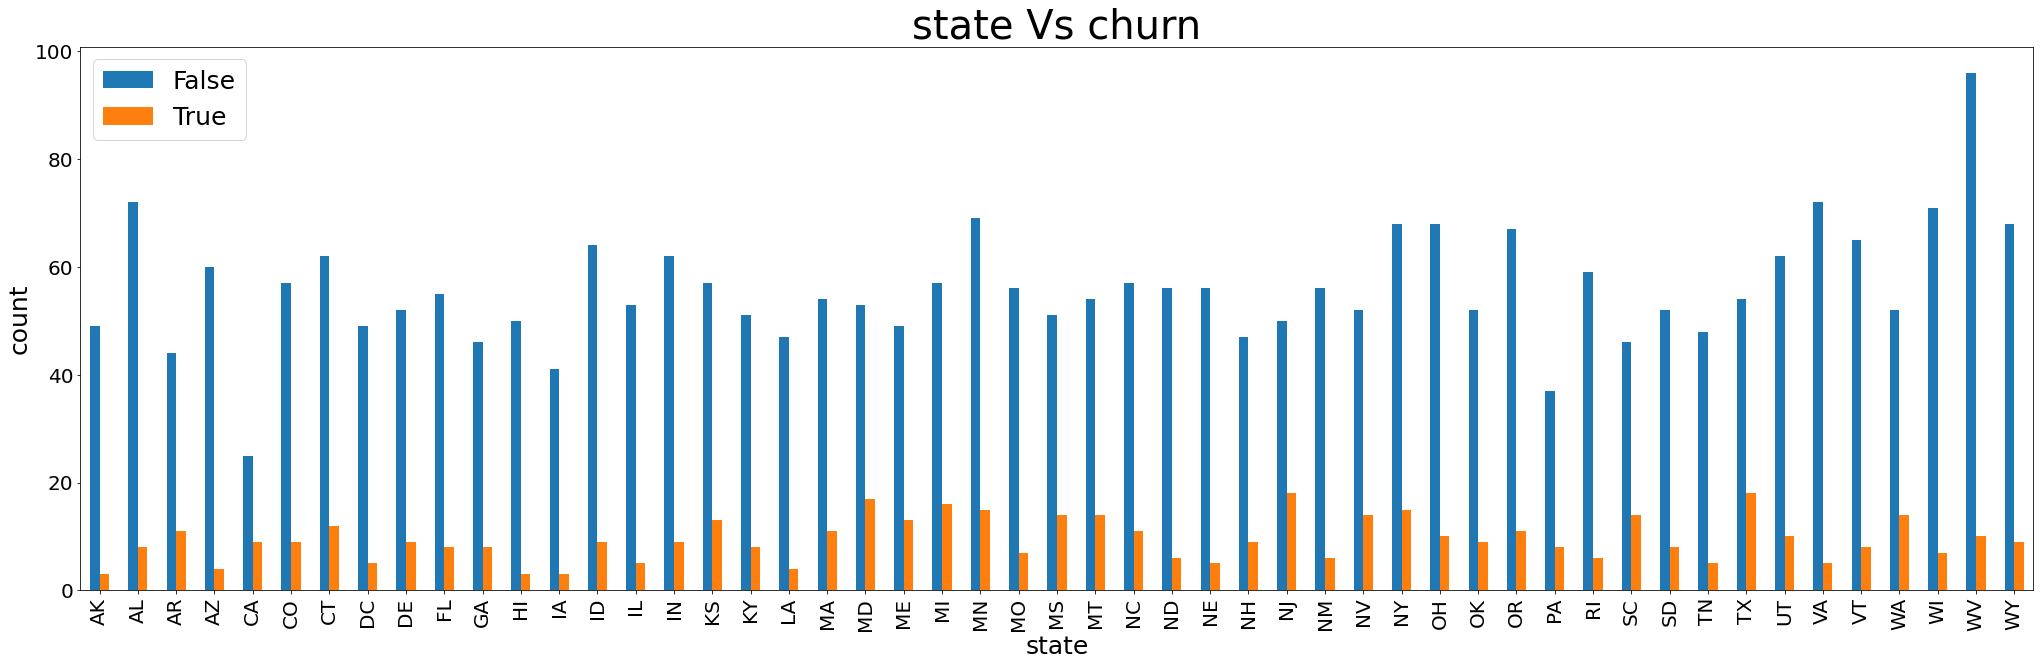

In [78]:
#State Wise Churn of customer
diff_bar('state','churn')

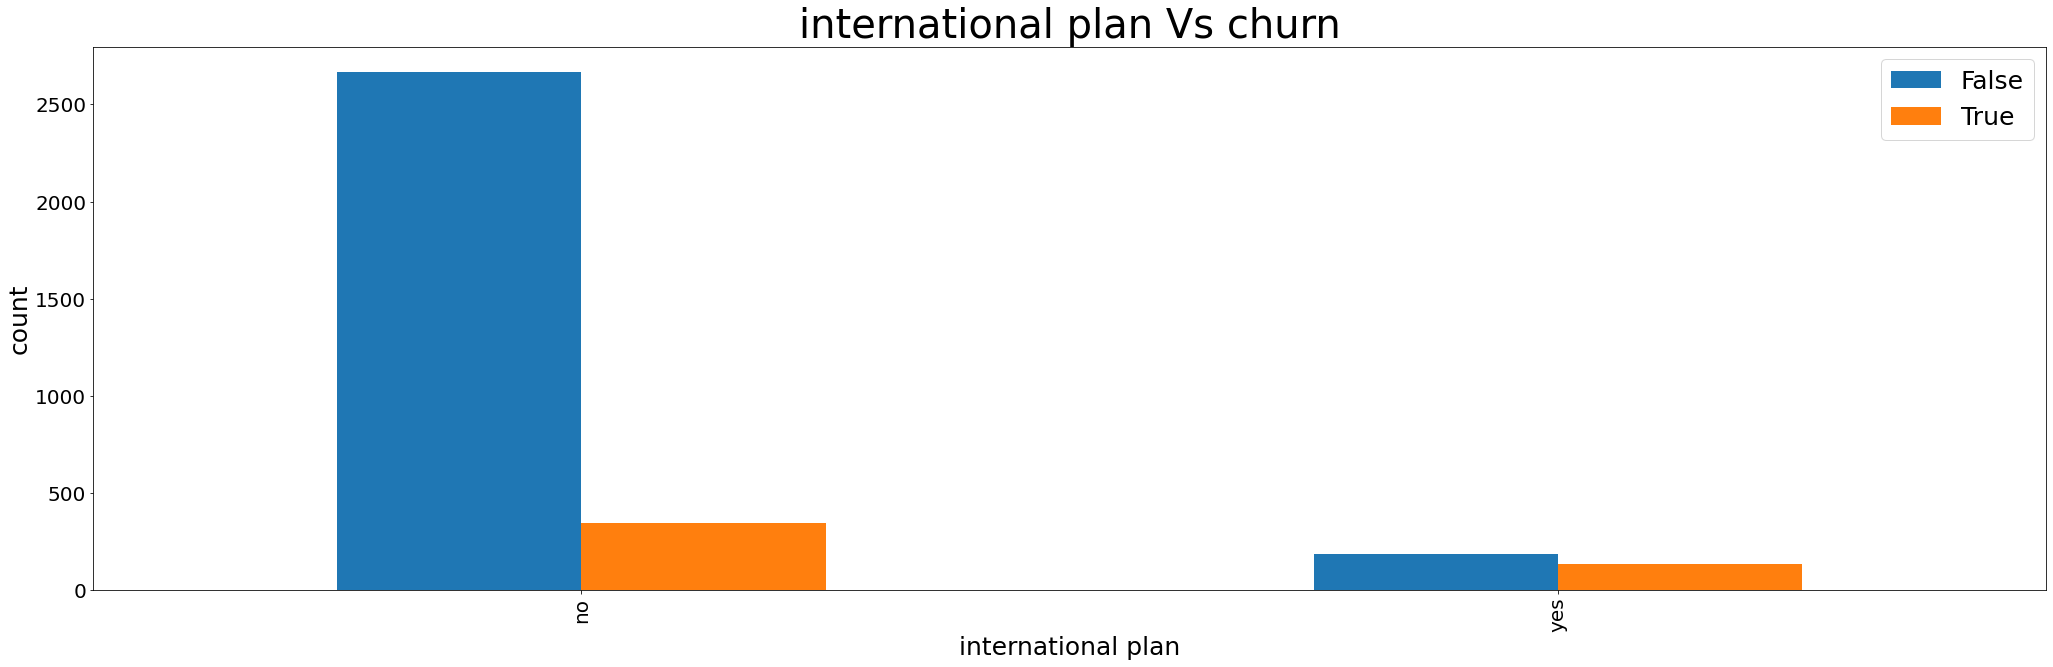

In [79]:
#International_Plan Wise Churning of customer
diff_bar('international plan','churn')

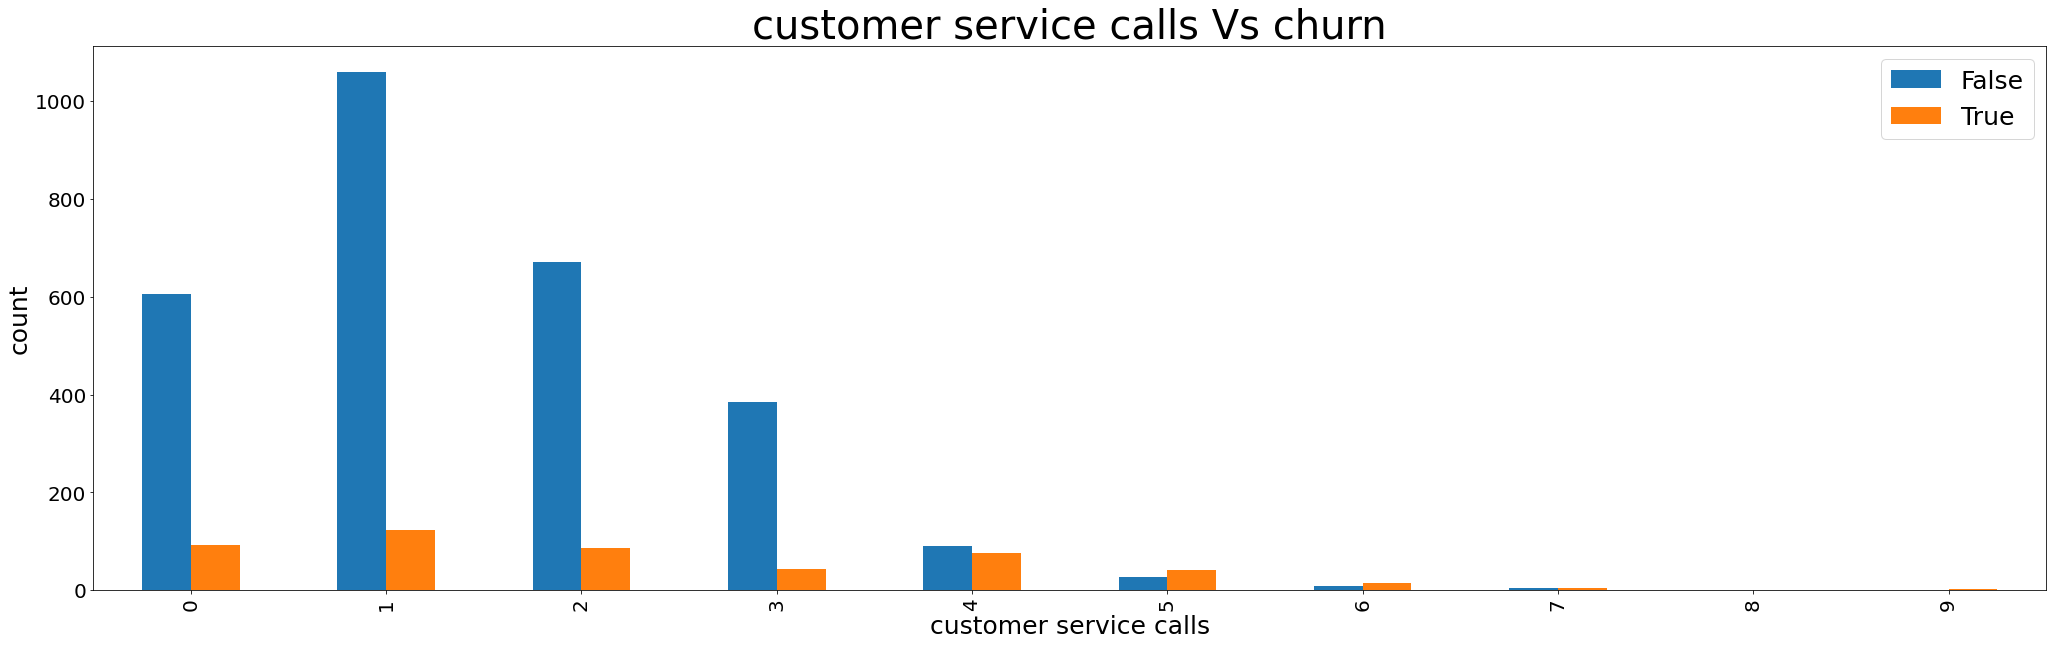

In [80]:
#Number of Customer_Service Call Wise Churning of customer
diff_bar('customer service calls','churn')

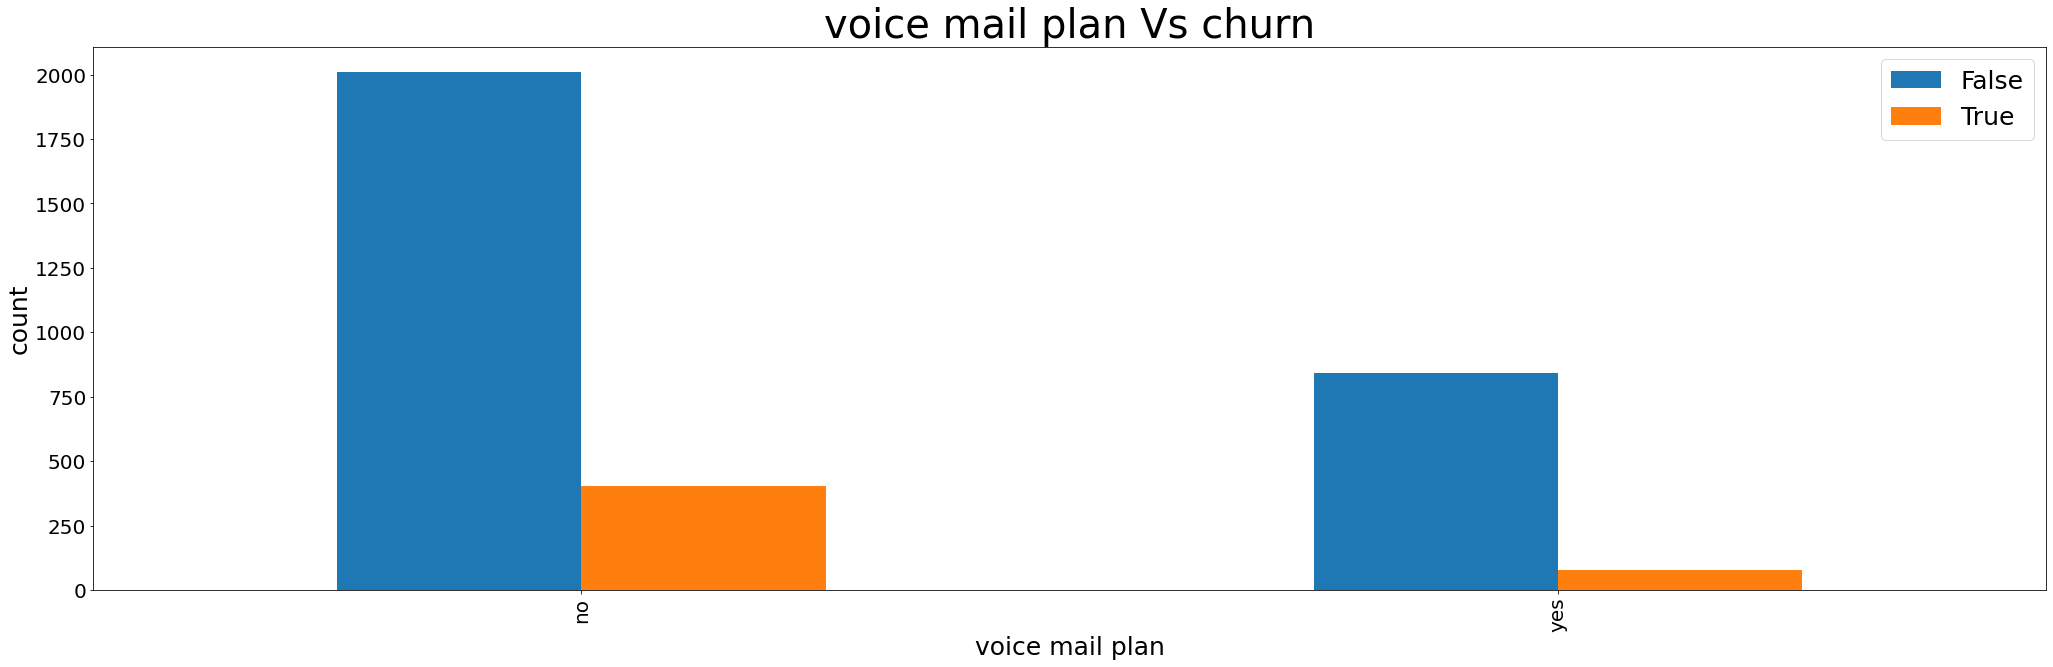

In [81]:
#No. of Customer Churning and had a Voice mail plan
diff_bar('voice mail plan','churn')

### Scatter plot 

In [82]:
def diff_scattr(x,y):
    fig = plt.figure()
    fig = sns.lmplot(x,y, data=df,fit_reg=False)
    plt.xlabel(x,fontsize= 14)
    plt.ylabel(y,fontsize= 14)
    plt.xticks(fontsize=10, rotation=90)
    plt.yticks(fontsize=10)
    plt.title("{X} and {Y} Scatter Plot".format(X=x,Y=y),fontsize = 16)
    #fig.savefig("{X}_and_{Y}_Scatter_Plot..png".format(X=x,Y=y))
    plt.show()

<Figure size 432x288 with 0 Axes>

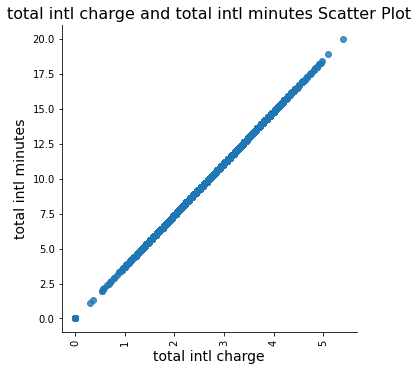

In [83]:
#Total intl charge and Total intl Minute
diff_scattr('total intl charge','total intl minutes')

In [84]:
''' From above graph it is clear that total interationl minutes increas then total inl charge increases '''

' From above graph it is clear that total interationl minutes increas then total inl charge increases '

<Figure size 432x288 with 0 Axes>

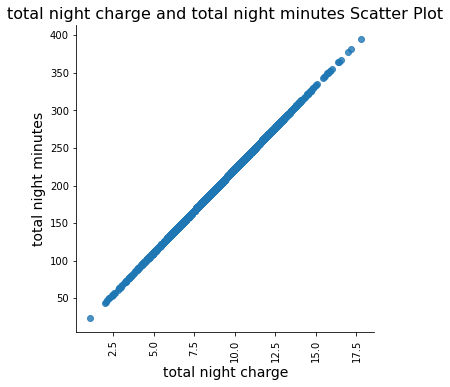

In [85]:
## Total night charge and Total night Minute
diff_scattr('total night charge','total night minutes')

<Figure size 432x288 with 0 Axes>

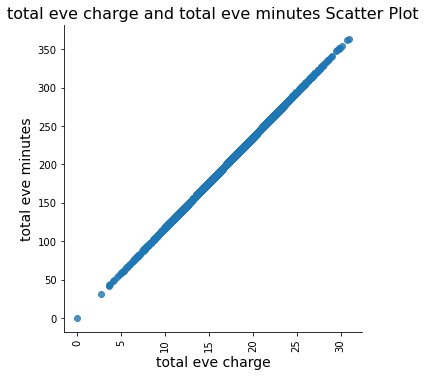

In [86]:
#Total eve charge and Total eve Minute
diff_scattr('total eve charge','total eve minutes')

In [87]:
#function for converting categoric to num codes
def cat_to_num(df):
    for i in range(0, df.shape[1]):
        #print(i)
        if(df.iloc[:,i].dtypes == 'object'):
            df.iloc[:,i] = pd.Categorical(df.iloc[:,i])
            df.iloc[:,i] = df.iloc[:,i].cat.codes
            df.iloc[:,i] = df.iloc[:,i].astype('object')
    return df

In [88]:
df = cat_to_num(df)

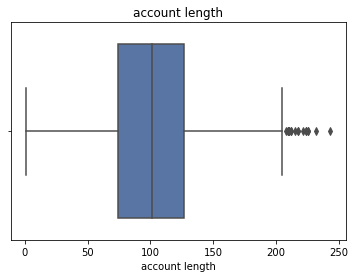

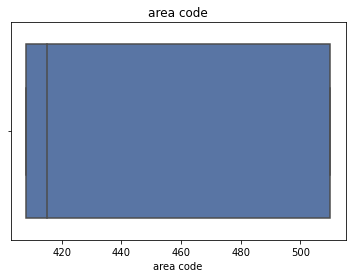

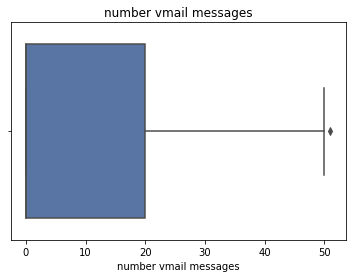

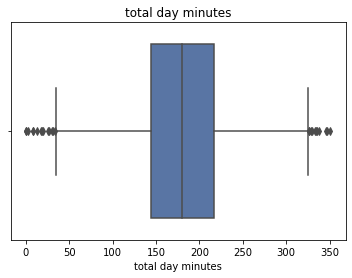

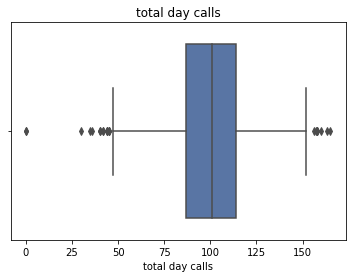

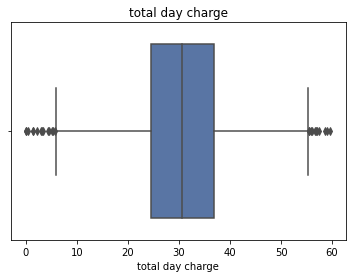

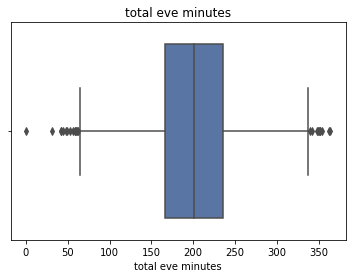

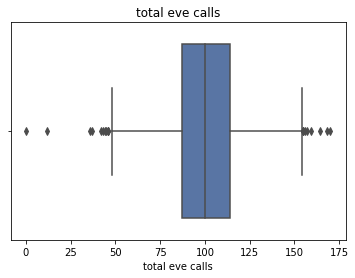

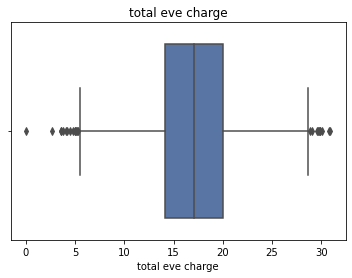

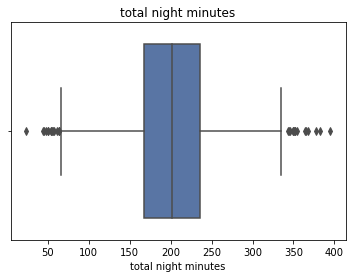

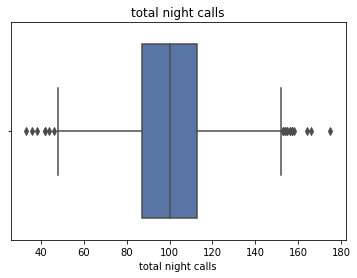

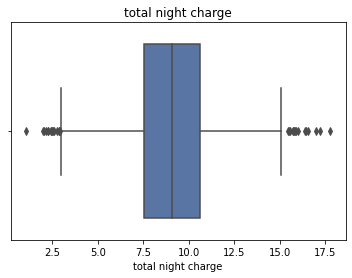

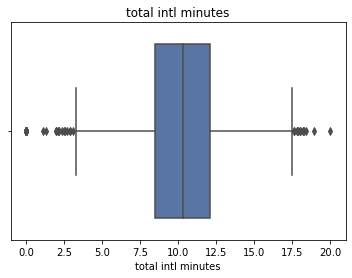

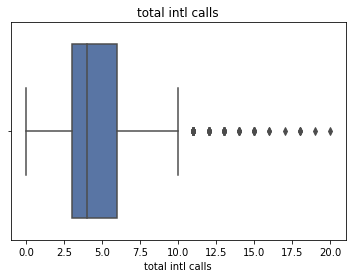

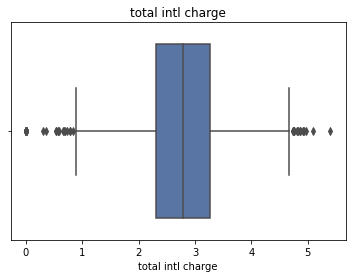

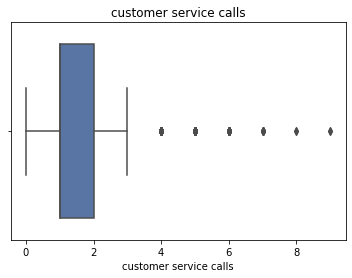

In [89]:
#Check the outliers with help of box plot 
for i in cname:
    plt.figure()
    plt.clf() #clearing the figure
    sns.boxplot(df[i],palette="deep")
    plt.title(i)
    plt.show()

#### Treating Outliers and Converting them to nan - with help of IQR (Inter Quartile Range ) 

In [90]:
for i in cname:
    #print(i)
    q75, q25 = np.percentile(df.loc[:,i], [75 ,25])
    iqr = q75 - q25
    minn = q25 - (iqr*1.5)
    maxx = q75 + (iqr*1.5)
#Converting to nan
    df.loc[df.loc[:,i] < minn,i] = np.nan
    df.loc[df.loc[:,i] > maxx,i] = np.nan
    print('{var} -----> {X}   Missing'.format(var = i, X = (df.loc[:,i].isnull().sum())))

account length -----> 18   Missing
area code -----> 0   Missing
number vmail messages -----> 1   Missing
total day minutes -----> 25   Missing
total day calls -----> 23   Missing
total day charge -----> 25   Missing
total eve minutes -----> 24   Missing
total eve calls -----> 20   Missing
total eve charge -----> 24   Missing
total night minutes -----> 30   Missing
total night calls -----> 22   Missing
total night charge -----> 30   Missing
total intl minutes -----> 46   Missing
total intl calls -----> 78   Missing
total intl charge -----> 49   Missing
customer service calls -----> 267   Missing


In [91]:
# Imputing with mean because fancyimpute not working
for i in cname:
    print (i)
    df = df.apply(lambda x:x.fillna(df.loc[:,i].mean()))

account length
area code
number vmail messages
total day minutes
total day calls
total day charge
total eve minutes
total eve calls
total eve charge
total night minutes
total night calls
total night charge
total intl minutes
total intl calls
total intl charge
customer service calls


In [92]:
df.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,16,128.0,415.0,0,1,25.0,265.1,110.0,45.07,197.400000,99.0,16.780000,244.7,91.0,11.01,10.0,3.0,2.70,1.0,False
1,35,107.0,415.0,0,1,26.0,161.6,123.0,27.47,195.500000,103.0,16.620000,254.4,103.0,11.45,13.7,3.0,3.70,1.0,False
2,31,137.0,415.0,0,0,0.0,243.4,114.0,41.38,121.200000,110.0,10.300000,162.6,104.0,7.32,12.2,5.0,3.29,0.0,False
3,35,84.0,408.0,1,0,0.0,299.4,71.0,50.90,100.430468,88.0,100.430468,196.9,89.0,8.86,6.6,7.0,1.78,2.0,False
4,36,75.0,415.0,1,0,0.0,166.7,113.0,28.34,148.300000,122.0,12.610000,186.9,121.0,8.41,10.1,3.0,2.73,3.0,False


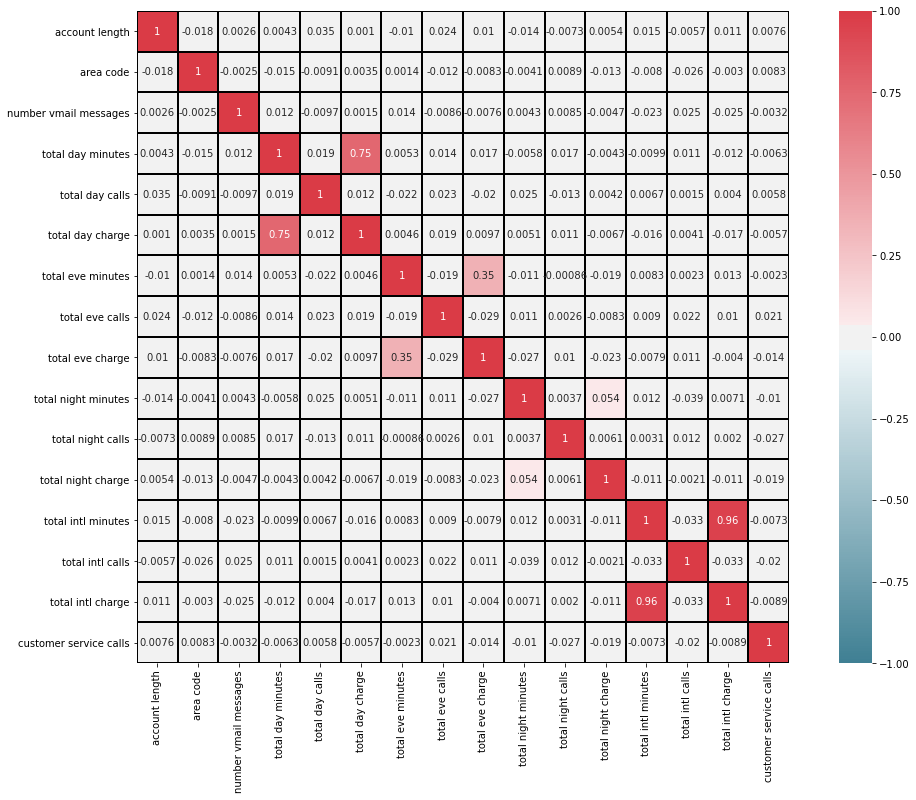

In [93]:
#Setting up the pane or matrix size
f, ax = plt.subplots(figsize=(18,12))  #Width,height

#Generating Corelation Matrix
corr = df[cname].corr()

#Plot using Seaborn library
sns.heatmap(corr,mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220,10, as_cmap=True),\
            square=True, ax=ax,annot=True,linewidths=1 , linecolor= 'black',vmin = -1, vmax = 1)

plt.show()

# Chi-Square test for Categorical variables

# Define Terms    
#chi2 = Actual chi square test value
#p = pvalue
#dof = degree of freedom
#ex = expected value

# As if p value is less than 0.05 then we will reject null hypothesis
#Null = both the variables are independent
#Alternate = Both the variables are not independent

In [94]:
#checking Relation b/w categorical variables with respect to target var
from scipy.stats import chi2_contingency
for i in cat_names:
    print(i)
    #As we know imput to chi square is always a contiguency table so we generating it using crostab function present in pd
    chi2, p, dof, ex =chi2_contingency(pd.crosstab(df['churn'],df[i]))
    #as above pd.crosstab(dependent variable , independent variable)
    print(p)

state
0.002296221552011188
international plan
2.4931077033159556e-50
voice mail plan
5.15063965903898e-09


In [95]:
#Removing correlated variable & the variable which doesn't contain any meaning full info
cols = ['state','total day charge','total eve charge','total night charge','total intl charge']
df = df.drop(cols,axis=1)

In [96]:
#Updating values _after removal of var
cname = ['account length', 'number vmail messages', 'total day minutes', 'total day calls', 'total eve minutes',
         'total eve calls', 'total night minutes', 'total night calls', 'total intl minutes', 'total intl calls',
         'customer service calls']

#All categorical var and removing target var
cat_names = ['area code', 'international plan', 'voice mail plan']

print('cname :- {}'.format(cname))
print()
print('cat_name :- {}'.format(cat_names))

cname :- ['account length', 'number vmail messages', 'total day minutes', 'total day calls', 'total eve minutes', 'total eve calls', 'total night minutes', 'total night calls', 'total intl minutes', 'total intl calls', 'customer service calls']

cat_name :- ['area code', 'international plan', 'voice mail plan']


 ## Feature Scaling 

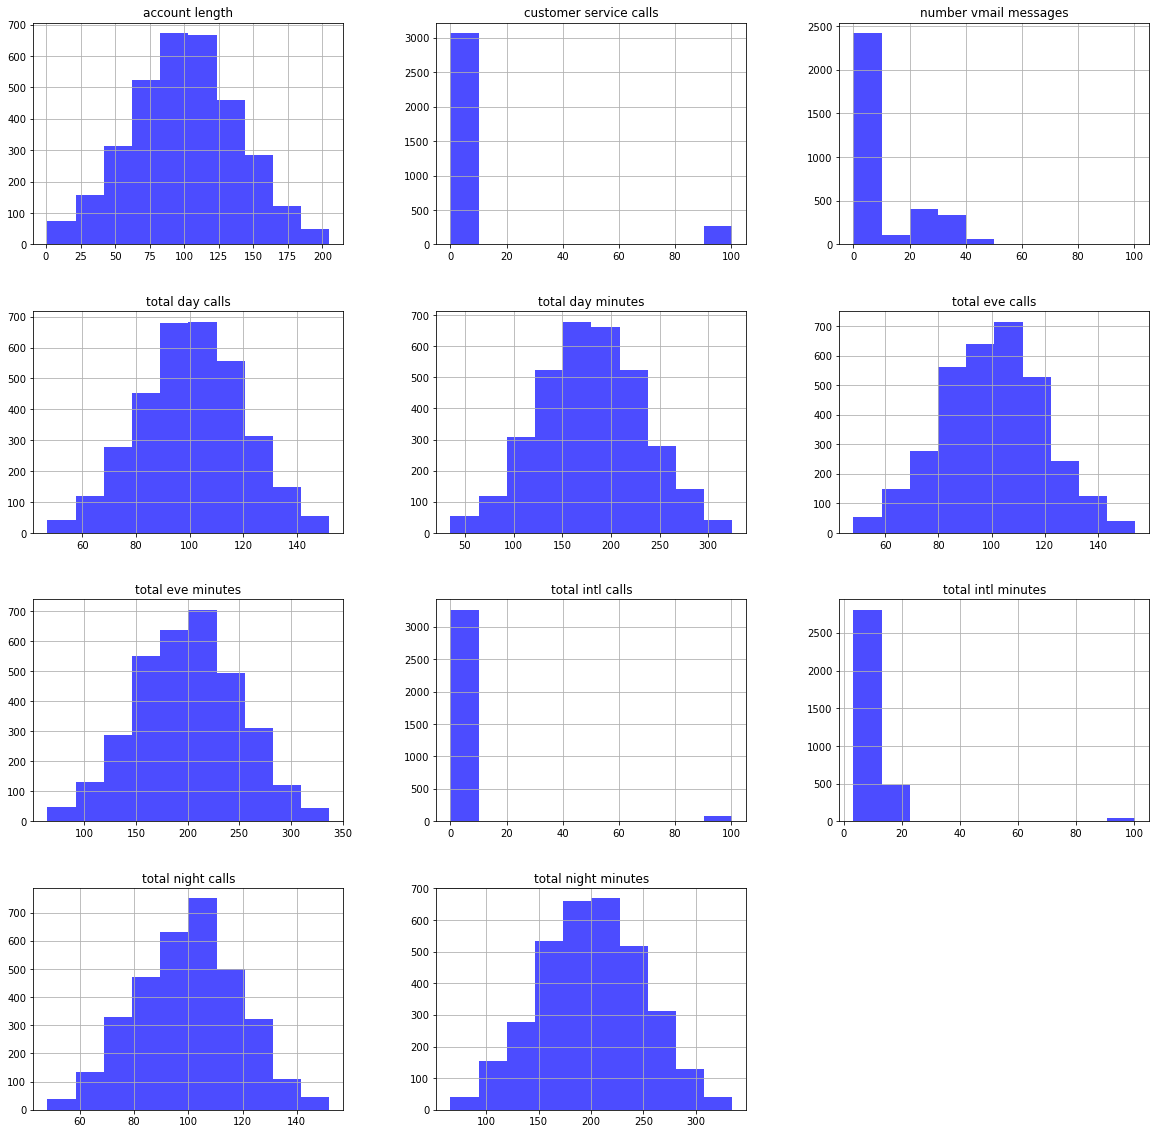

In [97]:
#Checking distribution of data via pandas visualization
df[cname].hist(figsize=(20,20),color='b',alpha = 0.7)
plt.show()

In [98]:
# SCaling 

In [99]:
#Applying standarization as most of the variables are normalized distributed
def scale_standard(df):
    for i in cname:
        #print(i)
        df[i] = (df[i] - df[i].mean())/df[i].std()
    return df

In [100]:
#Standardizing Scale
df = scale_standard(df)

In [101]:
df.head()

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls,churn
0,0.709198,415.0,0,1,1.227063,1.614493,0.486477,-0.061297,-0.060385,0.907666,-0.472959,-0.141945,-0.240350,-0.306021,False
1,0.168995,415.0,0,1,1.299730,-0.334191,1.158303,-0.099474,0.146749,1.104287,0.159308,0.199671,-0.240350,-0.306021,False
2,0.940714,415.0,0,0,-0.589607,1.205928,0.693193,-1.592403,0.509234,-0.756514,0.211997,0.061178,-0.104152,-0.343155,False
3,-0.422657,408.0,1,0,-0.589607,2.260289,-1.528998,-2.009730,-0.630004,-0.061248,-0.578336,-0.455862,0.032046,-0.268888,False
4,-0.654173,415.0,1,0,-0.589607,-0.238169,0.641514,-1.047876,1.130637,-0.263949,1.107708,-0.132712,-0.240350,-0.231755,False


# Train and Test split 

In [102]:
from sklearn.model_selection import train_test_split,RandomizedSearchCV
#Using train test split functionality for creatuing sampling
X = df.iloc[:,:14]
y = df.iloc[:,14]
y=y.astype('int')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [103]:
(X_train.shape),(y_train.shape)

((2233, 14), (2233,))

In [104]:
Smo = SMOTE(random_state=101)
X_train_res, y_train_res = Smo.fit_sample(X_train,y_train)

In [105]:
(X_train_res.shape,y_train_res.shape)

((3820, 14), (3820,))

# Predicting & Stats Function

In [106]:
def pred(model_object,predictors,compare):
    """1.model_object = model name
       2.predictors = data to be predicted
       3.compare = y_train"""
    predicted = model_object.predict(predictors)
    # Determine the false positive and true positive rates
    cm = pd.crosstab(compare,predicted)
    TN = cm.iloc[0,0]
    FN = cm.iloc[1,0]
    TP = cm.iloc[1,1]
    FP = cm.iloc[0,1]
    print("CONFUSION MATRIX ------->> ")
    print(cm)
    print()
    
    ##check accuracy of model
    print('Classification paradox :------->>')
    print('Accuracy :- ', round(((TP+TN)*100)/(TP+TN+FP+FN),2))
    print()
    print('Specificity //  True Negative Rate :- ',round((TN*100)/(TN+FP),2))
    print()
    print('Sensivity // True Positive Rate // Recall :- ',round((TP*100)/(FN+TP),2))
    print()
    print('False Negative Rate :- ',round((FN*100)/(FN+TP),2))
    print()
    print('False Postive Rate :- ',round((FP*100)/(FP+TN),2))
    print()
    print(classification_report(compare,predicted))

# Models 

In [107]:
# Machine Learning 
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# RandomForest Classifier

In [108]:
#Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100,random_state=101).fit(X_train_res,y_train_res)

#Model Score on Valdation Data Set
pred(rf_model,X_test,y_test)

CONFUSION MATRIX ------->> 
col_0    0    1
churn          
0      903   37
1       40  120

Classification paradox :------->>
Accuracy :-  93.0

Specificity //  True Negative Rate :-  96.06

Sensivity // True Positive Rate // Recall :-  75.0

False Negative Rate :-  25.0

False Postive Rate :-  3.94

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       940
           1       0.76      0.75      0.76       160

    accuracy                           0.93      1100
   macro avg       0.86      0.86      0.86      1100
weighted avg       0.93      0.93      0.93      1100



# Logistic Regression

In [109]:
#logistic without binaries
logit_model = LogisticRegression(random_state=42).fit(X_train_res,y_train_res)

#Model Score on Valdation Data Set
pred(logit_model,X_test,y_test)

CONFUSION MATRIX ------->> 
col_0    0    1
churn          
0      759  181
1       23  137

Classification paradox :------->>
Accuracy :-  81.45

Specificity //  True Negative Rate :-  80.74

Sensivity // True Positive Rate // Recall :-  85.62

False Negative Rate :-  14.38

False Postive Rate :-  19.26

              precision    recall  f1-score   support

           0       0.97      0.81      0.88       940
           1       0.43      0.86      0.57       160

    accuracy                           0.81      1100
   macro avg       0.70      0.83      0.73      1100
weighted avg       0.89      0.81      0.84      1100



# KNeighborsClassifier

In [110]:
#KNN Model Development
KNN_Model = KNeighborsClassifier(n_neighbors=5).fit(X_train_res,y_train_res)

#Model Score on Valdation Data Set
pred(KNN_Model,X_test,y_test)

CONFUSION MATRIX ------->> 
col_0    0    1
churn          
0      726  214
1       54  106

Classification paradox :------->>
Accuracy :-  75.64

Specificity //  True Negative Rate :-  77.23

Sensivity // True Positive Rate // Recall :-  66.25

False Negative Rate :-  33.75

False Postive Rate :-  22.77

              precision    recall  f1-score   support

           0       0.93      0.77      0.84       940
           1       0.33      0.66      0.44       160

    accuracy                           0.76      1100
   macro avg       0.63      0.72      0.64      1100
weighted avg       0.84      0.76      0.79      1100



# Navie Bayes

In [111]:
#Navie Model Development
Naive_model = GaussianNB().fit(X_train_res,y_train_res)

#Model Score on Valdation Data Set
pred(Naive_model,X_test,y_test)

CONFUSION MATRIX ------->> 
col_0    0    1
churn          
0      648  292
1       29  131

Classification paradox :------->>
Accuracy :-  70.82

Specificity //  True Negative Rate :-  68.94

Sensivity // True Positive Rate // Recall :-  81.88

False Negative Rate :-  18.12

False Postive Rate :-  31.06

              precision    recall  f1-score   support

           0       0.96      0.69      0.80       940
           1       0.31      0.82      0.45       160

    accuracy                           0.71      1100
   macro avg       0.63      0.75      0.63      1100
weighted avg       0.86      0.71      0.75      1100



In [112]:
# Random Forest

In [113]:
# Training Final Model With Optimum Parameters
final_Model = RandomForestClassifier(random_state=101, n_estimators = 500,n_jobs=-1)
final_Model.fit(X_train_res,y_train_res)

RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=101)

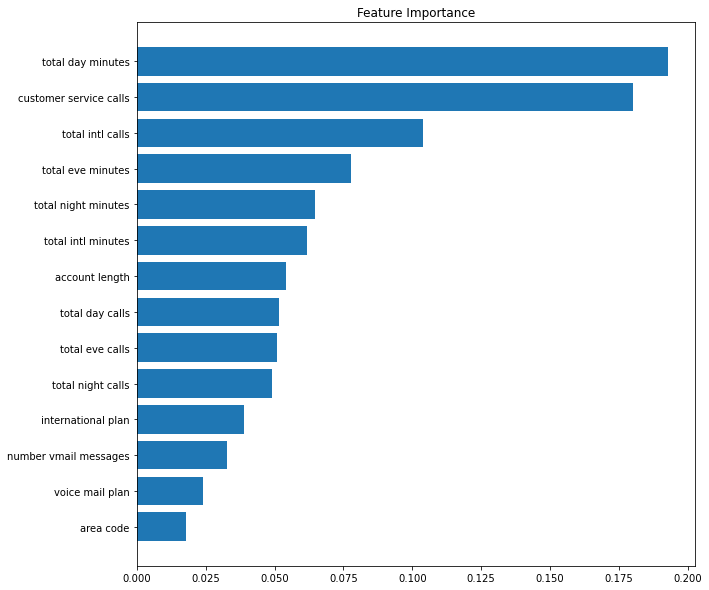

In [114]:
#Calculating feature importances
importances = final_Model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::1]

# Rearrange feature names so they match the sorted feature importances
names = [df.columns[i] for i in indices]

# Creating plot
fig = plt.figure(figsize=(10,10))
plt.title("Feature Importance")

# Add horizontal bars
plt.barh(range(X.shape[1]),importances[indices],align = 'center')
plt.yticks(range(X.shape[1]), names)
plt.show()

# Conclusion 
After observing the differnet models we came to conclude that Random Forest hold good accuracy score of 93%.

In [115]:
# Save the model
import joblib
joblib.dump(rf_model,'customer_churn.pkl')

['customer_churn.pkl']